<a href="https://colab.research.google.com/github/sushkbura/MiniProject_DecisionTrees_and_RandomForests/blob/main/Sush_MLE_MiniProject_Trees_and_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Breast Cancer Wisconsin dataset
data_bunch = load_breast_cancer(as_frame=True)

In [ ]:
# Split the dataset into training and testing sets
X = data_bunch.data
y = data_bunch.target
df = data_bunch.frame

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
# Display first 5 rows
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Create a Decision Tree model
dt_default = DecisionTreeClassifier(
    criterion="gini", random_state=42
)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

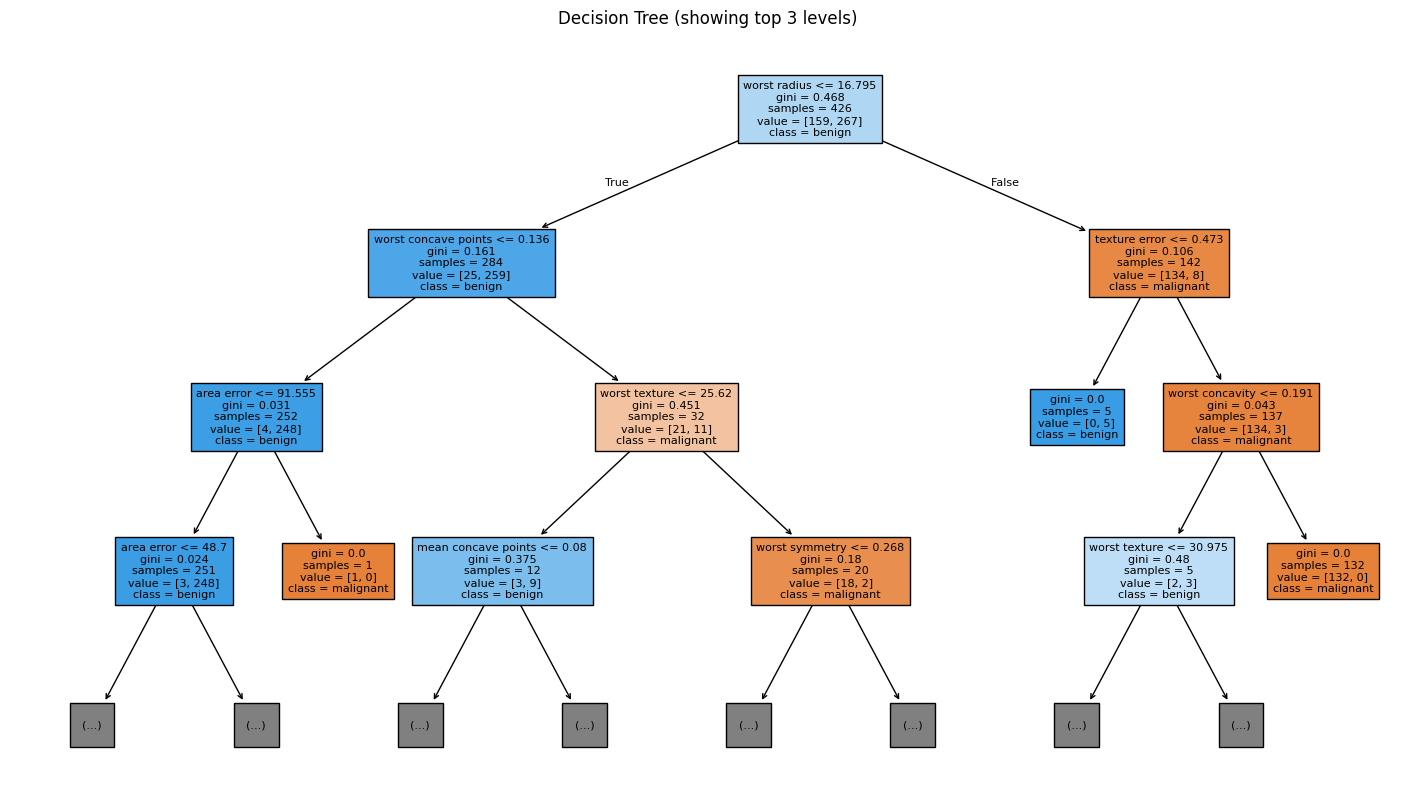

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(18, 10))
plot_tree(
    dt_default,
    feature_names=data_bunch.feature_names,
    class_names=list(data_bunch.target_names),
    filled=True,
    max_depth=3,
    fontsize=8
)
plt.title("Decision Tree (showing top 3 levels)")
plt.show()

Decision Tree variations (accuracy on test set):
   depth=None, leaf_nodes=None -> accuracy: 0.9231
      depth=2, leaf_nodes=None -> accuracy: 0.9091
      depth=4, leaf_nodes=None -> accuracy: 0.9441
     depth=None, leaf_nodes=10 -> accuracy: 0.9441
         depth=4, leaf_nodes=8 -> accuracy: 0.9441


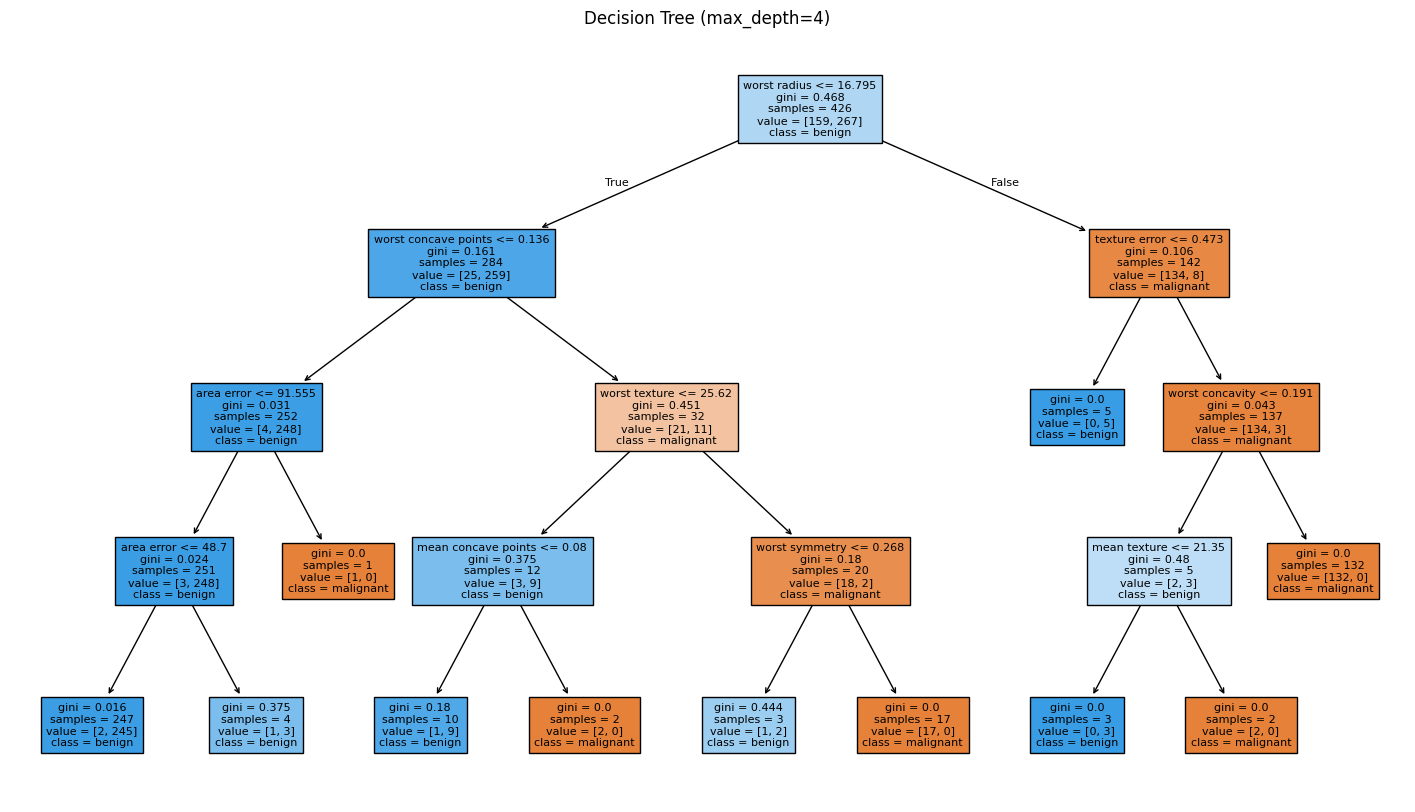

In [ ]:
# Iterating on the first two steps by trying different inputs to the decision tree classifier.
# Trying different max_depth and max_leaf_nodes.

configs = [
    {"max_depth": None, "max_leaf_nodes": None},
    {"max_depth": 2, "max_leaf_nodes": None},
    {"max_depth": 4, "max_leaf_nodes": None},
    {"max_depth": None, "max_leaf_nodes": 10},
    {"max_depth": 4, "max_leaf_nodes": 8},
]

dt_models = {}
print("Decision Tree variations (accuracy on test set):")
for cfg in configs:
    key = f"depth={cfg['max_depth']}, leaf_nodes={cfg['max_leaf_nodes']}"
    model = DecisionTreeClassifier(
        criterion="gini",
        random_state=42,
        max_depth=cfg["max_depth"],
        max_leaf_nodes=cfg["max_leaf_nodes"]
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    dt_models[key] = (model, acc)
    print(f"  {key:>28} -> accuracy: {acc:.4f}")

# Visualize one of the alternative trees (max_depth=4)
dt_depth4 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_depth4.fit(X_train, y_train)
plt.figure(figsize=(18, 10))
plot_tree(
    dt_depth4,
    feature_names=data_bunch.feature_names,
    class_names=list(data_bunch.target_names),
    filled=True,
    fontsize=8
)
plt.title("Decision Tree (max_depth=4)")
plt.show()


In [ ]:
# Train random forest model
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    max_features="sqrt"
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
# Extract feature importances
importances = rf.feature_importances_
feat_names = np.array(data_bunch.feature_names)
sorted_idx = np.argsort(importances)[::-1]


Random Forest feature importances (top 15):
worst perimeter                      0.1457
worst area                           0.1441
worst concave points                 0.1146
mean concave points                  0.0983
worst radius                         0.0724
mean radius                          0.0607
mean perimeter                       0.0560
mean concavity                       0.0452
mean area                            0.0368
worst concavity                      0.0282
area error                           0.0243
mean compactness                     0.0172
worst texture                        0.0167
radius error                         0.0166
mean texture                         0.0152


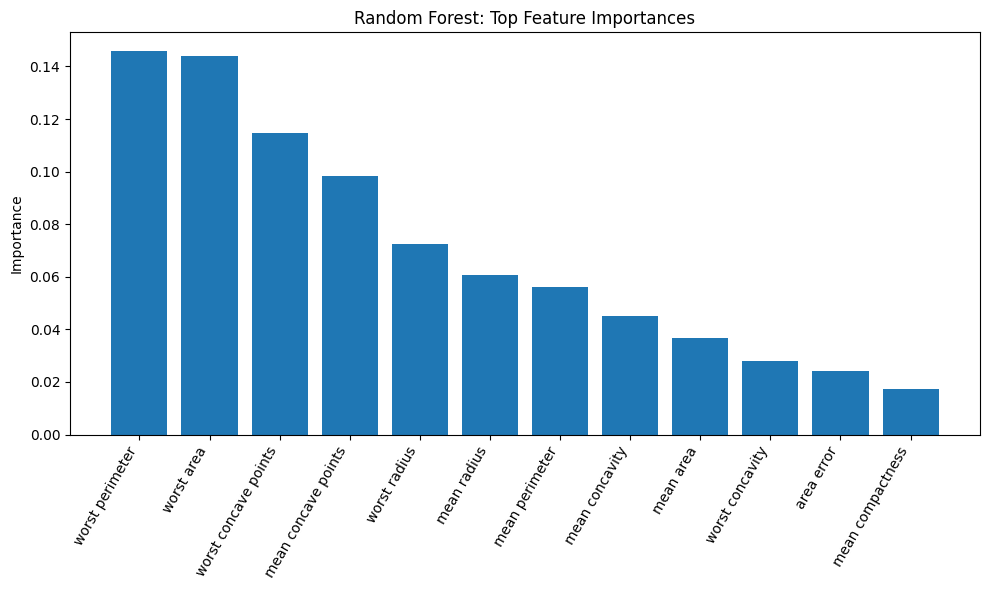

In [ ]:
# Print feature importance
print("\nRandom Forest feature importances (top 15):")
for i in sorted_idx[:15]:
    print(f"{feat_names[i]:35s}  {importances[i]:.4f}")

# bar plot of top features
top_k = 12
plt.figure(figsize=(10, 6))
plt.bar(range(top_k), importances[sorted_idx[:top_k]])
plt.xticks(range(top_k), feat_names[sorted_idx[:top_k]], rotation=60, ha="right")
plt.ylabel("Importance")
plt.title("Random Forest: Top Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
# Build and train an AdaBoostClassifier on your training data.
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [ ]:
# Evaluate models
def evaluate(name, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:20s} accuracy: {acc:.4f}")
    return acc

print("\nModel accuracy comparison (test set):")
acc_dt_default = evaluate("DecisionTree (default)", dt_default)
acc_dt_depth4  = evaluate("DecisionTree (depth=4)", dt_depth4)
acc_rf         = evaluate("RandomForest", rf)
acc_ada        = evaluate("AdaBoost", ada)

# Identify best performer
accs = {
    "DecisionTree (default)": acc_dt_default,
    "DecisionTree (depth=4)": acc_dt_depth4,
    "RandomForest": acc_rf,
    "AdaBoost": acc_ada
}
best_model_name = max(accs, key=accs.get)
print(f"\nBest model on this run: {best_model_name} (accuracy={accs[best_model_name]:.4f})")


Model accuracy comparison (test set):
DecisionTree (default) accuracy: 0.9231
DecisionTree (depth=4) accuracy: 0.9441
RandomForest         accuracy: 0.9580
AdaBoost             accuracy: 0.9580

Best model on this run: RandomForest (accuracy=0.9580)
